# Ch02 사이킷런으로 시작하는 머신러닝

## 01 사이킷런

In [1]:
import sklearn
print(sklearn.__version__)

1.0.2


## 02 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd

#붓꽃 데이터 세트를 로딩합니다.
iris=load_iris()

#iris.data.는 Iris 데이터 세트에서 피처만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data=iris.data

#iris.target은 붓꽃 데이터 세트에서 레이블 데이터를 numpy로 가지고 있습니다.
iris_label=iris.target
print("iris target 값 :", iris_label)
print("iris target 명 :", iris.target_names)

#붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다.
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head(3)

iris target 값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명 : ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
#test_size 파라미터 입력값의 비율로 분할

X_train, X_test, y_train, y_test=train_test_split(iris_data,iris_label, test_size=0.2, random_state=11)

In [5]:
#DecisionTreeClassfier 객체 생성
dt_clf=DecisionTreeClassifier(random_state=11)

In [6]:
#학습 수행
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=11)

In [7]:
#학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred=dt_clf.predict(X_test)

DecisionTreeClassifier의 예측 성능 평가 방법  
-정확도 : 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지 평가하는 지표  
        accuracy_score()함수

In [8]:
from sklearn.metrics import accuracy_score
print("예측 정확도 : {0:.4f}".format(accuracy_score(y_test,pred)))

예측 정확도 : 0.9333


예측 프로세스  
1. 데이터 세트 분리 : 학습 데이터와 테스트 데이터로 분리
2. 모델 학습 : 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델 학습
3. 예측 수행 : 학습된 ML 모델읠 이용해 테스트 데이터의 분류 예측
4. 평가 : 예측된 결과값과 테스트 데이터의 실제 결괏값 비교해 ML 모델 성능 평가

## 03 사이킷런의 기반 프레임워크 익히기

Estimator 이해 및 fit(), predict() 메서드

- 지도학습
    * 사이킷런은 ML 모델 학습을 위해서 fit(), 학습된 모델의 예측을 위해 predict() 메서드 제공
    * 분류 알고리즘을 구현한 클래스를 Classifier로, 회귀 알고리즘을 구현한 알고리즘은 Regressor로 지칭
    * 위의 두 클래스를 합쳐서 Estimator로 지칭  
  
- 비지도 학습(차원 축소, 클러스터링, 피처 추출)
    * fit()은 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업
    * transform()차원 변환, 클러스터링, 피처 추출등의 실제 작업 수행
    * 사이킷런은 fit_transform()을 함께 제공


사이킷런의 주요 모듈(교재 p.92-93)
- 피처 처리, ML 알고리즘 학습/예측 수행, 모델 평가의 단계 반복
- 사이킷런 패키지는 위의 주요 프로세스를 지원하기 위해 다양한 모듈 제공

내장된 데이터 세트
* 표본 데이터 생성기
    - 사이킷런에는 데이터 세트 내장
    - fetch 계열의 명령은 인터넷에서 내려받아 서브 디렉터리에 저장 후 불러들이는 데이터  
* 연습용 예제 데이터
    - 내장된 데이터 세트는 일반적으로 딕셔너리 형태
    - data는 피처의 데이터 세트, 넘파이 배열
    - target은 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트, 넘파이 배열
    - target_names는 개별 레이블의 이름, 넘파이 배열 또는 파이썬 리스트
    - feature_names는 피처의 이름, 넘파이 배열 또는 파이썬 리스트
    - DESCR은 데이터 세트에 대한 설명과 각 피처의 설명, 스트링 타입

In [9]:
# 피처의 데이터 값을 반환받기 위해서는 내장 데이터 세트를 호출한 뒤 그 Key값을 지정

from sklearn.datasets import load_iris
iris_data=load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [10]:
keys=iris_data.keys()
print("붓꽃 데이터 세트의 키들 :", keys)

붓꽃 데이터 세트의 키들 : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [11]:
# 붓꽃 데이터 세트의 각 키가 의미하는 값 표시
print('\n feature_names 의 type:',type(iris_data.feature_names))
print(' feature_names 의 shape:',len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names 의 type:',type(iris_data.target_names))
print(' feature_names 의 shape:',len(iris_data.target_names))
print(iris_data.target_names)

print('\n data 의 type:',type(iris_data.data))
print(' data 의 shape:',iris_data.data.shape)
print(iris_data['data'])

print('\n target 의 type:',type(iris_data.target))
print(' target 의 shape:',iris_data.target.shape)
print(iris_data.target)



 feature_names 의 type: <class 'list'>
 feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names 의 type: <class 'numpy.ndarray'>
 feature_names 의 shape: 3
['setosa' 'versicolor' 'virginica']

 data 의 type: <class 'numpy.ndarray'>
 data 의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0

## 04 Model Selcetion 모듈 소개

학습/테스트 데이터 세트 분리 - train_test_split()

In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#이미 학습한 학습 데이터로 예측
iris=load_iris()
dt_clf=DecisionTreeClassifier()
train_data=iris.data
train_label=iris.target
dt_clf.fit(train_data,train_label)

# 학습 데이터 세트로 예측 수행
pred=dt_clf.predict(train_data)
print("예측 정확도 :", accuracy_score(train_label,pred))

예측 정확도 : 1.0


train_test_split()의 파라미터
- test_size : 테스트 데이터 세트 크기 결정, 디폴트는 0.25
- train_size : 학습용 데이터 세트 크기 결정, test_size 파라미터를 주로 사용
- shuffle : 데이터를 미리 섞을지 결정, 디폴트는 True
- random_state : 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값, random_state를 지정하지 않으면 매번 다른 학습/테스트 용 데이터 생성

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dt_clf=DecisionTreeClassifier()
iris_data=load_iris()

X_train,X_test,y_train,y_test=train_test_split(iris_data.data, iris_data.target,
                                              test_size=0.3, random_state=21)

In [14]:
dt_clf.fit(X_train, y_train)
pred=dt_clf.predict(X_test)
print("예측 정확도 : {0:.4f}".format(accuracy_score(y_test,pred)))

예측 정확도 : 0.9333


교차 검증  

* 과적합(Overfitting) : 모델이 학습 데이터에만 과도하게 최적하되어, 실제 예측을 다른 데이터로 수행할 경우 예측 성능이 떨어지는 것
* 이러한 문제를 해결하기 위해 '교차 검증'을 진행

* 교차검증 : 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행
* 1차 평가 후 최종적으로 테스트 데이터 세트에 적용 평가

- K 폴드 교차 검증  
: K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])

붓꽃 데이터 세트 크기: 150


In [16]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환 
for train_index, test_index  in kfold.split(features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    #반복 시 마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


Stratified K 폴드 : 불균형한 분포도를 가진 레이블 데이터 집합을 위한 K 폴드 방식
* 레이블 값으로 1이 특정 개별 반복별 학습/테스트 데이터 세트에는 많이 포함되고 다른 반복 학습/테스트 데이터 세트에는 적게 포함되는 문제
* 따라서 Stratified K 폴드가 원본 데이터의 레이블 분포를 먼저 고려한 뒤 분포와 동일하게 세트를 분배

In [17]:
import pandas as pd

iris=load_iris()
iris_df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [18]:
# 3개의폴드 세트로 만들어지는 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출

kfold = KFold(n_splits=3)
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:\n 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:\n 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:\n 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:\n 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:\n 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:\n 2    50
Name: label, dtype: int64


In [19]:
# 동일한 데이터 분할 수행

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

# 레이블 데이터 분포도에 따라 나누기 때문에 split()메서드에 인자로 레이블 데이터 세트도 반드시 필요
for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


In [20]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index  in skfold.split(features, label):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)  
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산 \n",
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


In [21]:
# 왜곡된 레이블 데이터 세트에서는 반드시 Stratified K 폴드를 이용해 교차 검증
# 분류에서는 일반적으로 Stratified k 폴드로 분할/ 회귀에서는 지원되지 않음.

cross_val_score()
1. 폴드 세트로 설정 
2. for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스 추출
3. 반복적으로 학습과 예측 수행하고 예측 성능 반환

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data=load_iris()
dt_clf=DecisionTreeClassifier(random_state=156)

data=iris_data.data
label=iris_data.target

#성능 지표는 정확도, 교차 검증 세트는 3개
scores=cross_val_score(dt_clf,data,label,scoring='accuracy', cv=3)
print("교차 검증별 정확도 :", np.round(scores,4))
print("평균 검증 정확도 :", np.round(np.mean(scores),4))

교차 검증별 정확도 : [0.98 0.94 0.98]
평균 검증 정확도 : 0.9667


GridSearchCV- 교차 검증과 최적 하이퍼 파라미터 튜닝

* 하이퍼 파라미터 : 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정해 알고리즘의 예측 성능을 개선
* Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 최적의 파라미터 도출 방안 제공
* 순차적으로 파라미터를 테스트하므로 수행시간은 상대적으로 길다.

In [23]:
#max_depth : 트리의 최대 깊이
#min_samples_split : 자식 노드를 분할하는 데 필요한 최소 샘플 수
gird_parameters={'max_depth':[1,2,3],
                'min_samples_split':[2,3]}

GridSerachCV의 생성자

* estimator : classifier, regressor, pipeline이 사용
* param_grid : key+리스트 값을 가지는 딕셔너리, estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값 지정
* scoring : 예측 성능을 측정할 평가 방법
* cv: 교차 검증을 위해 분한되는 학습/테스트 세트의 개수
* refit : 디폴트가 True, True로 생성 시 가장 최적으리 하이퍼 파라미터를 찾은 뒤 재학습

In [24]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data=load_iris()
X_train,X_test, y_train, y_test=train_test_split(iris_data.data, iris_data.target,
                                                test_size=0.2, random_state=21)

dtree=DecisionTreeClassifier()

### 파라미터를 딕셔너리 형태로 설정
parameters={'max_depth' :[1,2,3], 'min_samples_split': [2,3]}

In [25]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 결정
### refit=True가 디폴트임. True이면 가장 좋은 파라미터 설정으로 재학습
grid_dtree=GridSearchCV(dtree,param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df=pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.683333,5,0.700,0.675,0.675
1,"{'max_depth': 1, 'min_samples_split': 3}",0.683333,5,0.700,0.675,0.675
2,"{'max_depth': 2, 'min_samples_split': 2}",0.975000,3,0.950,0.975,1.000
3,"{'max_depth': 2, 'min_samples_split': 3}",0.975000,3,0.950,0.975,1.000
4,"{'max_depth': 3, 'min_samples_split': 2}",0.991667,1,0.975,1.000,1.000
5,"{'max_depth': 3, 'min_samples_split': 3}",0.991667,1,0.975,1.000,1.000


params : 수행할 때마다 적용도니 개별 하이퍼 파라미터 값  
rank_test_score는 하이퍼 파라미터별로 성능이 좋은 score 순위  
mean_test_score는 개별 하이퍼파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값  

In [26]:
#최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평가 결과 값이 각각 best_params_,best_score_속성에 기록

print("GridSearchCV 최적 파라미터 :", grid_dtree.best_params_)
print("GridSearchCV 최고 정확도 :{0:.4f}".format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :0.9917


In [27]:
#GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator=grid_dtree.best_estimator_

#GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred=estimator.predict(X_test)
print("테스트 데이터 세트 정확도 : {0:.4f}".format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도 : 0.9333


## 05 데이터 전처리

결손값(Null)값은 허용하지 않는다.
-> 따라서 고정된 다른 값으로 변환
* Null값이 매우 적다면 피처의 평균값 등으로 간단히 대체
* Null값이 대부분이라면 해당 피처 드롭
* 일정 수준 이상이 될 때는 정밀한 대체 값을 선정해야 한다.

사이킷런 머신러닝 알고리즘은 숫자 형으로만 입력 허용
* 카테고리형 피처는 코드 값으로
* 텍스트형 피처는 피처 벡터화등의 기법으로 벡터화하거나 불필요한 피처라고 판단되면 삭제

### 데이터 인코딩
* 레이블 인코딩 : 카테고리 피처를 코드형 숫자 값으로 변환, 선형 회귀와 같은 알고리즘에는 적용하지 않아야 한다.
* 원-핫 인코딩 : 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0 표시

In [28]:
# 레이블 인코딩

from sklearn.preprocessing import LabelEncoder

items=['TV', '냉장고', '전자레인지', '컴퓨터','선풍기', '선풍기', '믹서', '믹서']

#LabelEncoder를 개체로 생성한 후,
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
print("인코딩 변환값 :", labels)

인코딩 변환값 : [0 1 4 5 3 3 2 2]


In [29]:
#인코딩된 자료 값 확인
print("인코딩 클래스:", encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [30]:
#인코딩된 값을 다시 디코딩
print("디코딩 원본값 :", encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값 : ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [31]:
#원-핫 인코딩 
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#2차원 ndarray로 변환
items=np.array(items).reshape(-1,1)

#원-핫 인코딩을 적용합니다.
oh_encoder=OneHotEncoder()
oh_encoder.fit(items)
oh_labels=oh_encoder.transform(items)

#OneHotEncoder로 변환된 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환
print("원-핫 인코딩 데이터")
print(oh_labels.toarray())
print("원-핫 인코딩 데이터 차원")
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [32]:
import pandas as pd

df=pd.DataFrame({'item':['TV','냉장고','전자레인지', '컴퓨터','선풍기','선풍기','믹서','믹서']})

pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 피처 스케일링과 정규화

피처 스케일링 : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
* 표준화 : 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환  
* 정규화 : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념, 개별 데이터의 크기를 모두 똑같은 단위로 변경


### StrandardScaler

개별 피처를 평균이 0이고, 분산이 1인 값으로 변환

In [33]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환합니다.
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

print("feature 들의 평균 값")
print(iris_df.mean())
print("\nfeature 들의 분산 값")
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [34]:
from sklearn.preprocessing import StandardScaler

#StandardScaler객체 생성
scaler=StandardScaler()
#StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

#transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print("feature들의 평균 값")
print(iris_df_scaled.mean())
print("\nfeature들의 분산 값")
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### MinMaxScaler

데이터값을 0과 1 사이의 범위 값으로 변환

In [35]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler=MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

#transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print("feature들의 최솟값")
print(iris_df_scaled.min())
print("\nfeature들의 최댓값")
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

fit()은 데이터 변환을 위한 기준 정보 설정 적용  
transform()은 설정된 정보를 이용해 데이터 변환

* 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용

In [36]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array=np.arange(0,11).reshape(-1,1)
test_array=np.arange(0,6).reshape(-1,1)

In [37]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으려 변환
scaler=MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10 -> 1로 변환됨.
train_scaled=scaler.transform(train_array)

print("원본 train_array 데이터 :", np.round(train_array.reshape(-1),2))
print("Scale된 train_array 데이터 :", np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [38]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled=scaler.transform(test_array)

#test_array의 scale 변환 출력.
print("원본 test_array 데이터:", np.round(test_array.reshape(-1),2))
print("Scale된 test_array 데이터:", np.round(test_scaled.reshape(-2),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


서로 다른 원본값이 동일한 값으로 변환되는 결과  
반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 하며, 테스트 데이터의 1 값은 학습 데이터와 동일하게 0.1 갑승로 변환되야 한다.

In [39]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함.
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


fit_transform()은 테스트 데이터에서는 절대 사용하지 말아야 한다.  
분리하기 전에 먼저 전체 데이터 세트에 스케일링을 적용한 뒤 분리  
여의치 않으면 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환

## 06 사이킷런으로 수행하는 타이타닉 생존자 예측

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df=pd.read_csv(r"C:\Users\songs\Downloads\titanic_train.csv")
titanic_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [41]:
print("\n ###학습 데이터 정보 ###\n")
print(titanic_df.info())


 ###학습 데이터 정보 ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [42]:
# Null 값 처리
#평균으로 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
# N으로 변경
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print("데이터 세트 Null 값 개수", titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [45]:
print("Sex 값 분포 :\n", titanic_df['Sex'].value_counts())
print("\n Cabin 값 분포 :\n", titanic_df['Cabin'].value_counts())
print("\n Embarked 값 분포 :\n", titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [46]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    NaN
1      C
2    NaN
Name: Cabin, dtype: object


In [47]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

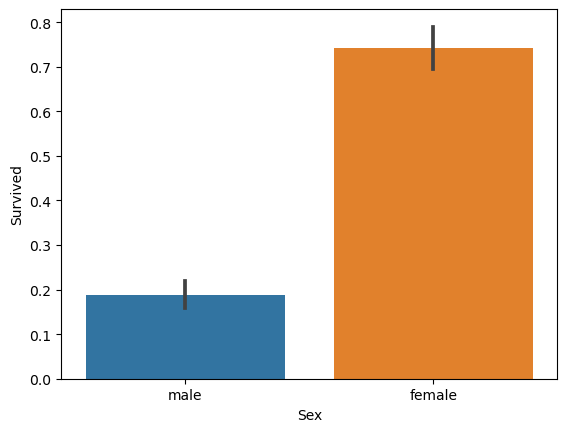

In [48]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

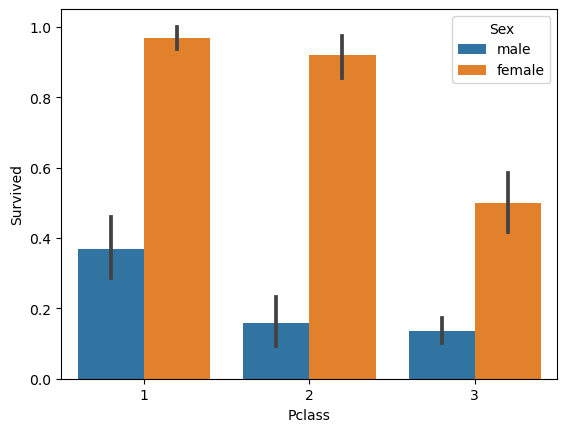

In [49]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

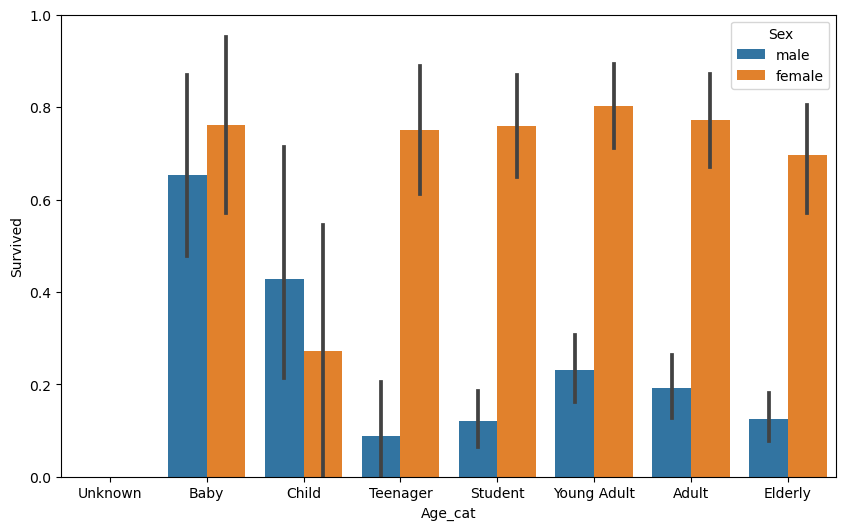

In [50]:
#입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용.
def get_category(age):
    cat=''
    if age<=-1: cat='Unknown'
    elif age<=5: cat='Baby'
    elif age<=12: cat='Child'
    elif age<=18: cat='Teenager'
    elif age<=25: cat='Student'
    elif age<=35: cat='Young Adult'
    elif age<=60: cat='Adult'
    else : cat='Elderly'
        
    return cat

#막대 그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

#lambda 식에 위에서 생성한 get_category()함수를 반환값으로 지정.
#get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop("Age_cat", axis=1, inplace=True)

In [51]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
        
    return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,8,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,8,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,8,2


In [52]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features=['Cabin', 'Sex','Embarked']
    for feature in features :
        le=LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    return df

In [53]:
#원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df=pd.read_csv(r"C:\Users\songs\Downloads\titanic_train.csv")
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived', axis=1)

X_train_df=transform_features(X_titanic_df)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression(solver='liblinear')

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
print("DecisionTreeClassifier 정확도: {0:.4f}".format(accuracy_score(y_test,dt_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
print("RandomForestClassifier 정확도: {0:.4f}".format(accuracy_score(y_test,rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
print("LogisticRegression 정확도: {0:.4f}".format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8659


In [56]:
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
    #폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold=KFold(n_splits=folds)
    scores=[]
    
    #KFold 교차 검증 수행
    for iter_count,(train_index,test_index) in enumerate(kfold.split(X_train_df)):
        #X_train_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train,X_test=X_titanic_df.values[train_index],X_titanic_df.values[test_index]
        y_train,y_test=y_titanic_df.values[train_index],y_titanic_df.values[test_index]
        #Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train,y_train)
        predictions=clf.predict(X_test)
        accuracy=accuracy_score(y_test,predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count,accuracy))
        
    #5개 fold에서의 평균 정확도 계산
    mean_score=np.mean(scores)
    print("평균 정확도 : {0:.4f}".format(mean_score))
#exec_kfold 호출
exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7823


In [57]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [58]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10], 
           'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

grid_dclf=GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train,y_train)

print("GridSearchCV 최적 하이퍼 파라미터:", grid_dclf.best_params_)
print("GridSearchCV 최고 정확도: {0:.4f}".format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions=best_dclf.predict(X_test)
accuracy=accuracy_score(y_test,dpredictions)
print("테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}".format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
